In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
origin_df = pd.read_csv('/Users/meitavsivan/data_projects/Restaurant_Orders/restaurant_orders.csv')
data=origin_df.copy()

In [3]:
data.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [5]:
data.columns

Index(['Order ID', 'Customer Name', 'Food Item', 'Category', 'Quantity',
       'Price', 'Payment Method', 'Order Time'],
      dtype='object')

In [6]:
# change Order Time to date data  type
data['Order Time'] = pd.to_datetime(data['Order Time'])

Now will divide the day into 4 bins - morning, lunch, dinner, nightcrave
will try find trends in order time 

In [7]:
#addind weekday and month columns
data["weekday_name"] = data['Order Time'].dt.day_name()

data["month_name"] = data['Order Time'].dt.month_name()

In [8]:
def categorize_time(x):
    hour = x.hour
    if 5 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 15:
        return "Lunch"
    elif 15 <= hour < 21:
        return "Dinner"
    else:
        return "Night"

# Apply function
data["time_category"] = data['Order Time'].apply(categorize_time)

data

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,weekday_name,month_name,time_category
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,Sunday,February,Lunch
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,Sunday,June,Morning
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,Tuesday,March,Morning
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,Thursday,May,Lunch
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,Saturday,March,Lunch
...,...,...,...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02,Wednesday,January,Dinner
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19,Tuesday,July,Dinner
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28,Sunday,August,Night
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06,Wednesday,July,Morning


In [9]:
data["time_category"].value_counts()

time_category
Night      146
Morning    132
Dinner     116
Lunch      106
Name: count, dtype: int64

seems that night craves are wellcomed ;) 
lets see what time of the day is the most profitable

In [10]:
grouped_data = data.groupby('time_category')['Price',].sum()
grouped_data

,Price
time_category,
Dinner,1673.09
Lunch,1400.66
Morning,1663.95
Night,1860.89


What are the most common food categories for each time category?

In [11]:
for i in pd.unique(data["time_category"]) :
    food_time_category = data.loc[data["time_category"] == i]['Category'].value_counts()
    print(i, food_time_category )

Lunch Category
Starter    45
Main       32
Dessert    29
Name: count, dtype: int64
Morning Category
Dessert    49
Starter    46
Main       37
Name: count, dtype: int64
Dinner Category
Main       42
Dessert    40
Starter    34
Name: count, dtype: int64
Night Category
Main       56
Dessert    50
Starter    40
Name: count, dtype: int64


In [12]:
grouped_data = data.groupby('weekday_name')['Price',].sum()
print('summed sales per each day')
grouped_data

summed sales per each day


,Price
weekday_name,
Friday,827.06
Monday,885.91
Saturday,866.82
Sunday,1098.97
Thursday,914.00
Tuesday,924.07
Wednesday,1081.76


In [13]:
grouped_data = data.groupby('month_name')['Price',].sum()
print('summed sales per each month')
grouped_data

summed sales per each month


,Price
month_name,
April,891.63
August,388.09
February,806.90
January,681.54
July,1068.24
June,864.85
March,1074.31
May,823.03


What payment method is common for each time of the day?

In [14]:
pay_time_category = pd.DataFrame()
for i in pd.unique(data["time_category"]) :
    pay_time_category = pd.concat([pay_time_category, data.loc[data["time_category"] == i]['Payment Method'].value_counts()], axis=1)
    pay_time_category.rename(columns={'count': i}, inplace=True)
pay_time_category

,Lunch,Morning,Dinner,Night
Debit Card,30,23,38,28
Online Payment,27,25,30,39
Cash,26,36,27,43
Credit Card,23,48,21,36


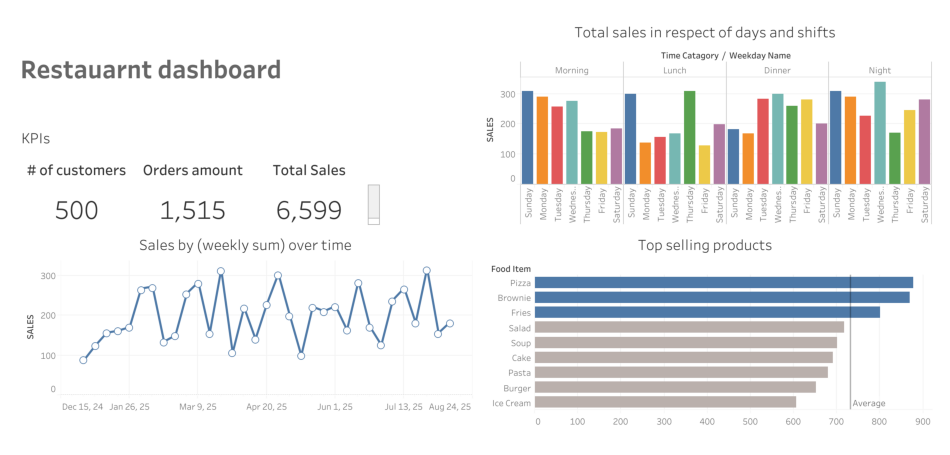

In [19]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 10))
plt.axis('off')
img = mpimg.imread('Dashboard 1 (2).png')
imgplot = plt.imshow(img)
plt.show()